In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [5]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


C:\Users\kulwa\AppData\Local\Temp\ipykernel_7780\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

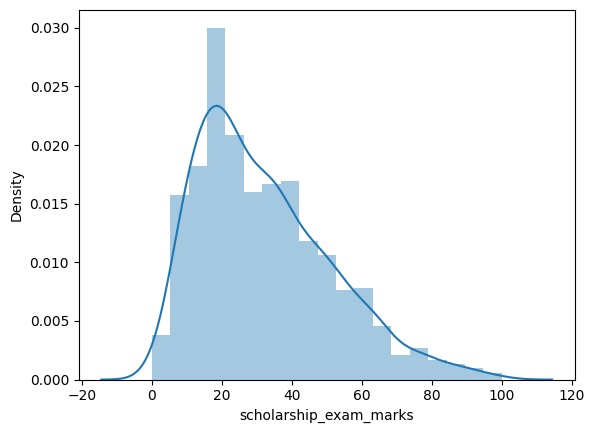

In [6]:
sns.distplot(data["scholarship_exam_marks"])

In [7]:
data["scholarship_exam_marks"].skew()

0.8356419499466834

<font size="2">The skew() function in pandas calculates the skewness of the distribution of a data series. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In this context, the function data["scholarship_exam_marks"].skew() will compute the skewness of the scholarship_exam_marks column in the DataFrame data.

Skewness Interpretation<br>
Positive Skew (Right-Skewed): If the skewness is greater than 0, it means the data are skewed to the right. This implies that the right tail (higher values) is longer or fatter than the left tail.<br>
Negative Skew (Left-Skewed): If the skewness is less than 0, it means the data are skewed to the left. This implies that the left tail (lower values) is longer or fatter than the right tail.<br>
Zero Skew (Symmetrical Distribution): If the skewness is approximately 0, it means the data are fairly symmetrical.</font>

In [8]:
data["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<Axes: ylabel='scholarship_exam_marks'>

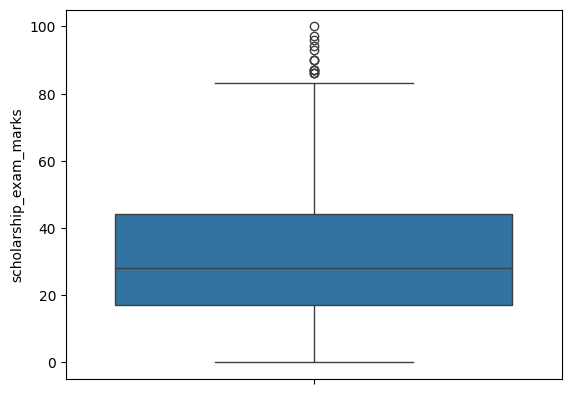

In [9]:
sns.boxplot(data["scholarship_exam_marks"])

In [10]:
percentile25 = data["scholarship_exam_marks"].quantile(0.25)
percentile75 = data["scholarship_exam_marks"].quantile(0.75)
print(percentile25)
print(percentile75)

17.0
44.0


In [11]:
IQR = percentile75-percentile25
IQR

27.0

In [12]:
#general method to find outliers
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR
print(min)
print(max)

-23.5
84.5


In [13]:
outliers = df[(df["scholarship_exam_marks"]<min) | (data["scholarship_exam_marks"]>max)]
outliers

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


In [14]:
#Trmming
new_data = df[(df["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


C:\Users\kulwa\AppData\Local\Temp\ipykernel_7780\4067592496.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])
C:\Users\kulwa\AppData\Local\Temp\ipykernel_7780\4067592496.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["scholarship_exam_marks"])


<Axes: ylabel='scholarship_exam_marks'>

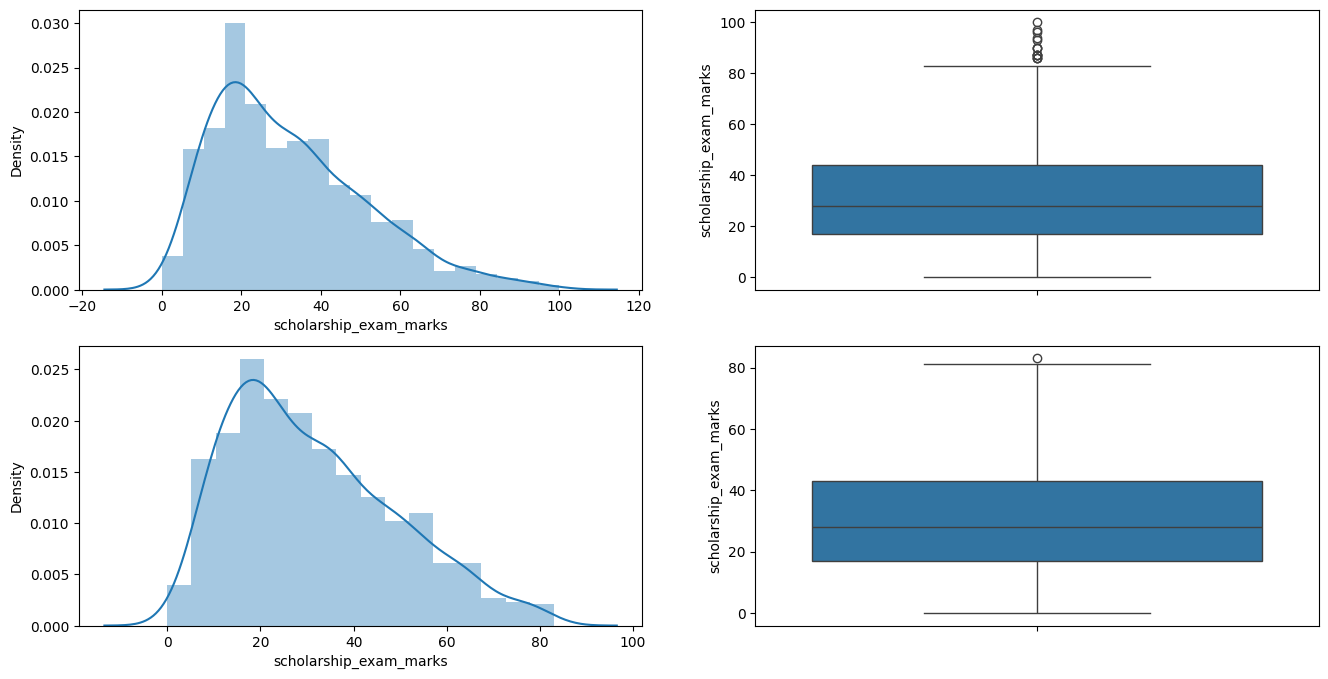

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["scholarship_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(df["scholarship_exam_marks"])
plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])


Capping

In [16]:
df["scholarship_exam_marks"] = np.where(df["scholarship_exam_marks"]>max, max, np.where(df["scholarship_exam_marks"]<min,min,df["scholarship_exam_marks"]))

In [17]:
df.shape

(1000, 3)

In [18]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.136500,0.489000
std,6.158979,18.865419,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,84.500000,1.000000


<font size="12">Percentile</font>

In [21]:
data1 = pd.read_csv("weight-height.csv")

In [22]:
df1 = data1.copy()

In [23]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
df1.shape

(10000, 3)

In [25]:
df1.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\kulwa\AppData\Local\Temp\ipykernel_7780\2771757589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Height"])


<Axes: xlabel='Height', ylabel='Density'>

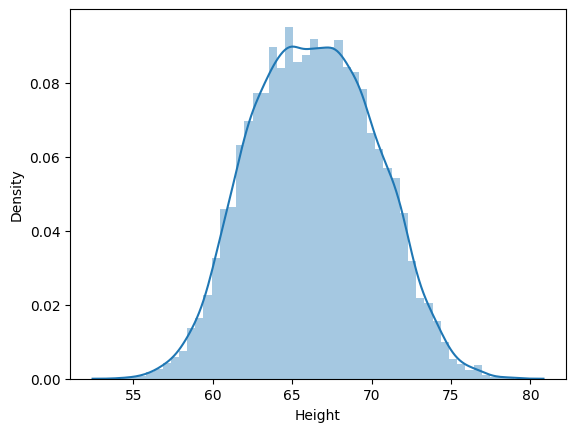

In [27]:
sns.distplot(df1["Height"])

<Axes: ylabel='Height'>

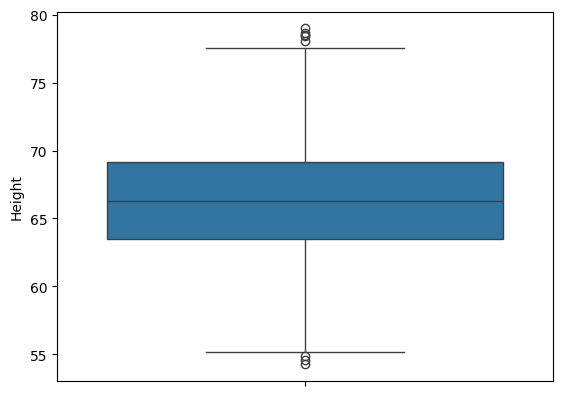

In [28]:
sns.boxplot(df1["Height"])

In [29]:
df1["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [31]:
max_limit = df1["Height"].quantile(0.99)                #calculates the value below which a given percentage of observations in a dataset falls
min_limit = df1["Height"].quantile(0.01)
print(max_limit)
print(min_limit)

74.7857900583366
58.13441158671655


Trimming

In [32]:
new_data1 = df1[(df1["Height"]>min_limit) & (df1["Height"]<max_limit)]
new_data1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\kulwa\AppData\Local\Temp\ipykernel_7780\785350096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1["Height"])


<Axes: xlabel='Height', ylabel='Density'>

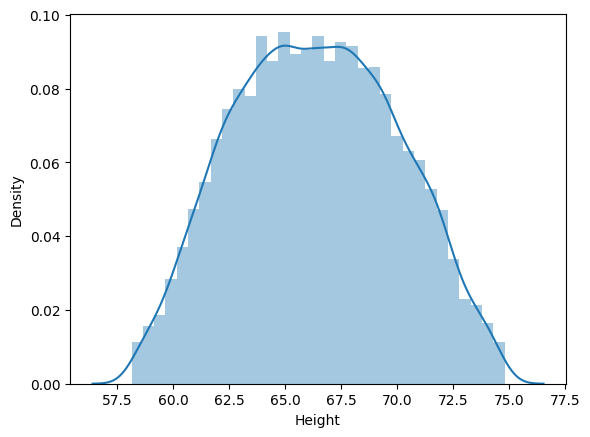

In [37]:
sns.distplot(new_data1["Height"])

<Axes: ylabel='Height'>

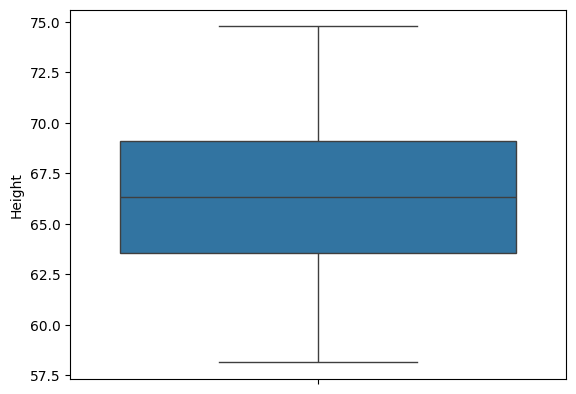

In [38]:
sns.boxplot(new_data1["Height"])

Capping

In [40]:
new_data2 = df1.copy()
new_data2["Height"] = np.where(df1["Height"]>max_limit,max_limit,np.where(df1["Height"]<min_limit,min_limit,df1["Height"]))

In [42]:
new_data2.shape

(10000, 3)

C:\Users\kulwa\AppData\Local\Temp\ipykernel_7780\1197117282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data2["Height"])


<Axes: xlabel='Height', ylabel='Density'>

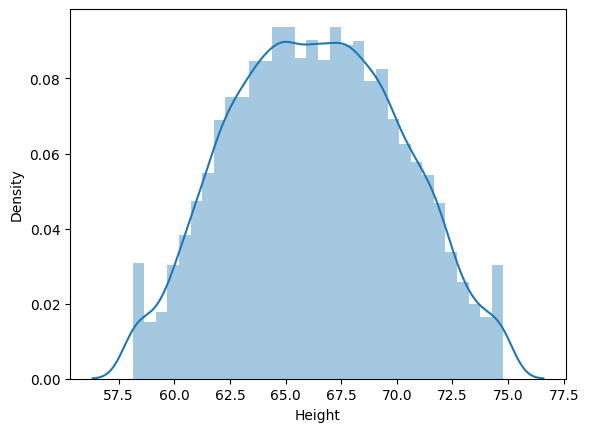

In [43]:
sns.distplot(new_data2["Height"])

If we have normal distribution then we use z_score.<br>
If we have skew distribution then we use IQR.<br>
In any other case we can use percentile.